## Intro to pyplot
[Pyplot tutorial — Matplotlib 3.2.2 documentation](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

In [2]:
import matplotlib.pyplot as plt

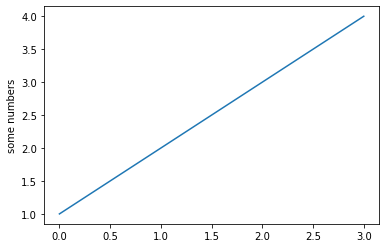

In [4]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

x-axis ranges are from 0 to 3 and y-axis ranges are from 1 to 4.  
-> matplotlib assumes it's a subsequence of y values if provided a single list or array to the `plot()` command, and automatically generates x values.  
-> python ranges start with 0, so the x data are `[0, 1, 2, 3]`.

`plot()` takes arbitrary number of arguments. For example, to plot x versus y, issue the command:

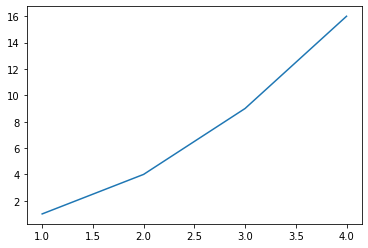

In [6]:
 plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

### Formatting the style of your plot
`plot()` takes an optional third argument which is the format string that indicates the color and line type of the plot.  
The default format string is `'b-'`, which is a solid blue line. For example, to plot the above with red circle, you would issue:

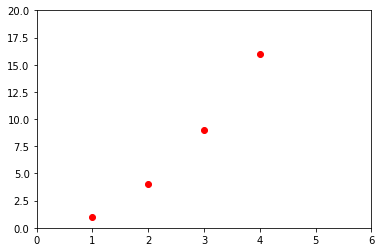

In [9]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

The `axis()` comand in the example above takes a list of `[xmin, xmax, ymin, ymax]` and specifies the viewport of the axes.  

You can use `numpy` arrays as well. In fact, all sequences are converted to numpy arrays internally. The example below illustrates plotting several lines with different format styles in one command using arrays.

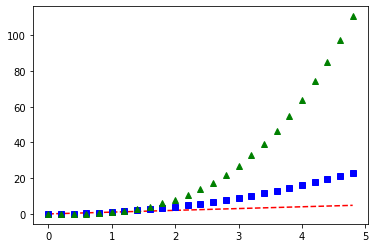

In [16]:
import numpy as np

# evenly sampled time at 200ms intervals
# array([0. , 0.2, 0.4, ..., 4.8])
t = np.arange(0., 5., 0.2)

# 'r--' means red dashes, 'bs' means blue squares, and 'g^' means green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

### Plotting with keyword strings
When you have data in a format that lets you access particular variables with strings e.g. `numpy.recarray` or `pandas.DataFrame`, Matplotlib allows you provide an object with the `data` keyword argument.

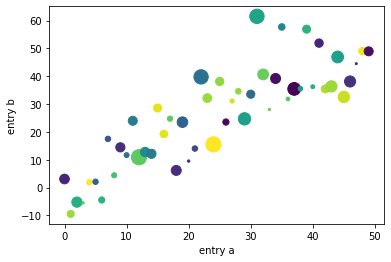

In [23]:
data = {
  'a': np.arange(50),
  'c': np.random.randint(0, 50, 50),
  'd': np.random.randn(50)
}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
# data['a']: array([ 0,  1, ..., 49])
# data['b']: array([ 1.87418372, 22.49151435, ..., 55.34094044])
# data['c']: array([18, 30, ...,  5])
# data['d']: array([ 10.73312264,  47.66945483, ..., 12.58385563])

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Plotting with categorical variables
It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions.
For example:

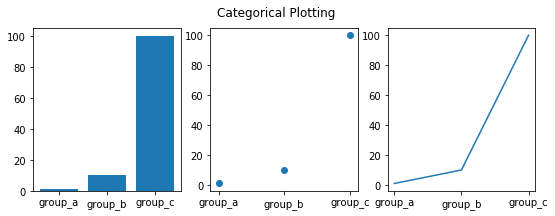

In [30]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

You can set line properties in the `**kwargs` parameter which specifies properties like a linewidth, antialiasing, and marker face color. There are several ways to set line properties.
- Use keyword args:
  ```python
  plt.plot(x, y, linewidth=2.0)
  ```
- Use the setter methods of a `Line2D` instance. `plot` returns a list of `Line2D` objects; e.g., `line1, line2 = plot(x1, y1, x2, y2)`. In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpaacking with `line`, to get the first element of that list:
  ```python
  line, = plt.plot(x, y, '-')
  line.set_antialiased(False) # turn off antialiasing
  ```
- Use the `setp()` command. The example below uses a MATLAB-style command to set multiple properties on a list of lines. `setp` works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:
  ```python
  lines = plt.plot(x1, y1, x2, y2)
  # use keyword args
  plt.setp(lines, color='r', linewidth=2.0)
  # or MATLAB style string value pairs
  plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
  ```

To get a list of settable line properties, call the `setp()` function with a line or lines as argument:

agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  mar

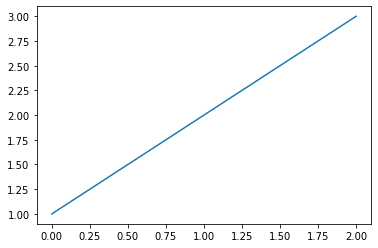

In [32]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

### Working with multiple figures and axes
MATLAB, and `pyplot`, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function `gca()` returns the current (a `matplotlib.axes.Axes` instance), and `gcf()` returns the current figure (`matplotlib.figure.Figure` instance).

Figure(432x288)
---


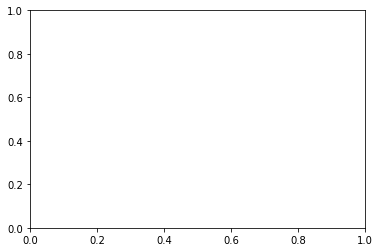

In [41]:
print(plt.gcf())
print('---')
plt.gca()

Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

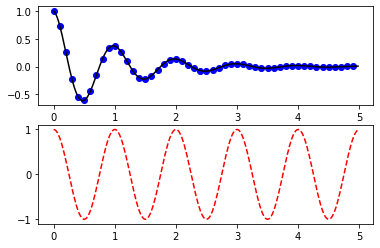

In [49]:
def f(t):
  return np.exp(-t) * np.cos(2*np.pi*t) # Fourier Transformation?

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The `figure()` command here is optional because `figure(1)` will be created by default, just as a `subplot(111)` will be created by default if you don't manually specify any axes. The `subplot()` command specifies `numrows`, `numcols`, `plot_number`, where `plot_number` ranges from 1 to `numrows * numcols`. The commas in the `subplot()` comamnd are optional if `numrows * numcols < 10`. So `subplot(211)` is identical to `subplot(2, 1, 1)`.  
You can create multiple figures by using multiple `figure()` calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as you want:

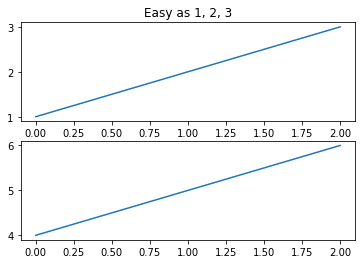

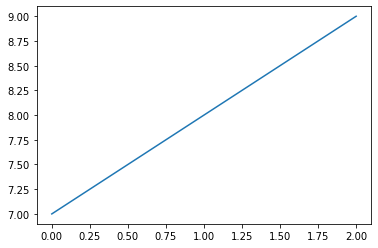

In [57]:
import matplotlib.pyplot as plt

plt.figure(1)       # the first figure
plt.subplot(211)    # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)    # the second subplot in the first figure
plt.plot([4, 5, 6])

plt.figure(2)       # the second figure
plt.plot([7, 8, 9]) # creates a subplot(111) by default

plt.figure(1)       # figure 1 current; subplot(212) still current
plt.subplot(211)    # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.show()

You can clear the current figure with `clf()` and the current axes with `cla()`.  
If you are making lots of figures, you need to be aware of the memory required for a figure. The memory is not completely released until the figure is explicitly closed with `close()`. Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until `close()` is called.

### Next
[Pyplot tutorial — Matplotlib 3.2.2 documentation](https://matplotlib.org/tutorials/introductory/pyplot.html#working-with-text)

## Questions
- What do the arguments of `scatter()` specify?
- What does `figsize` in `figure()` mean?
- What does `subplot()` specify?
  - `subplot()` command specifies the number of axes and the current axes using `numrows`, `numcols`, and `plot_number`.
  - `subplot()` command specifies `numrows`, `numcols`, `plot_number`, where `plot_number` ranges from 1 to `numrows * numcols`.   
    The commas in the `subplot()` comamnd are optional if `numrows * numcols < 10`. So `subplot(211)` is identical to `subplot(2, 1, 1)`.
- What does `plot()` return?
  - A list of `Line2D` objects representing the plotted data.
  - [matplotlib.pyplot.plot — Matplotlib 3.2.2 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- What is the antialiasing?